In [4]:
import numpy as np
# dataframe opertations - pandas
import pandas as pd
# plotting data - matplotlib
from matplotlib import pyplot as plt
# time series - statsmodels 
# Seasonality decomposition
from statsmodels.tsa.seasonal import seasonal_decompose 
# holt winters 
# single exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   
# double and triple exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [5]:
# 2. Đọc file dữ liệu chứng khoán AAPL và chia train test validate theo tỉ lệ 7:1:2
df = pd.read_csv('D:/Năm 3/Học kỳ 2/ThucHanhPTDK/Holt winters/AAPL.csv')
df = df[['Open']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

In [53]:
df.isnull().sum()

Open    0
dtype: int64

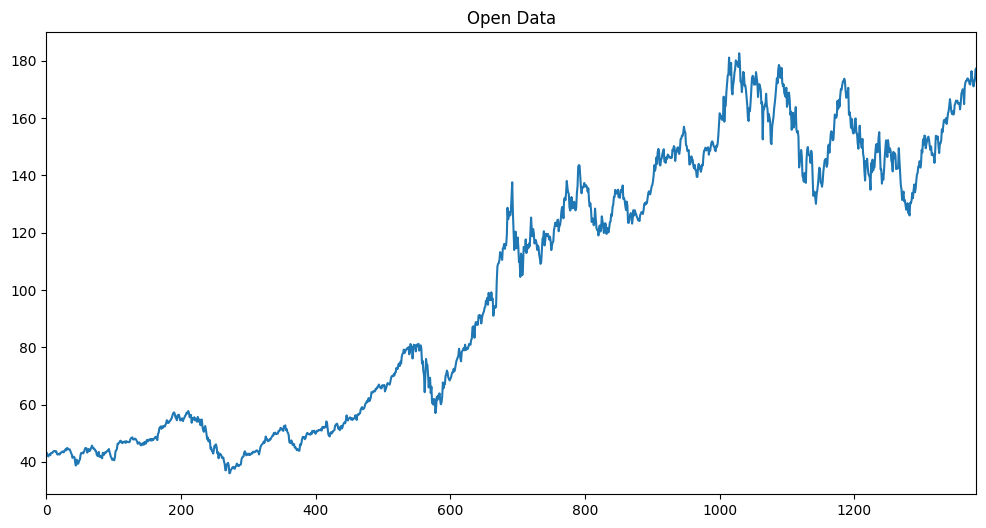

In [54]:
df['Open'].plot(figsize=(12,6),title='Open Data').autoscale(axis='x',tight=True)

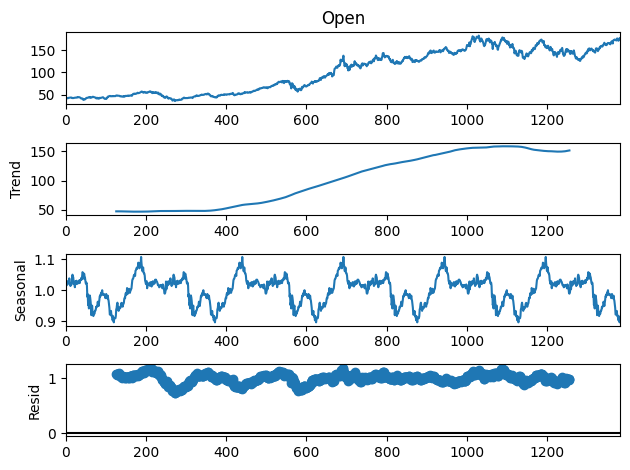

In [6]:
decompose_result = seasonal_decompose(df['Open'],model='multiplicative', period=252)
decompose_result.plot();

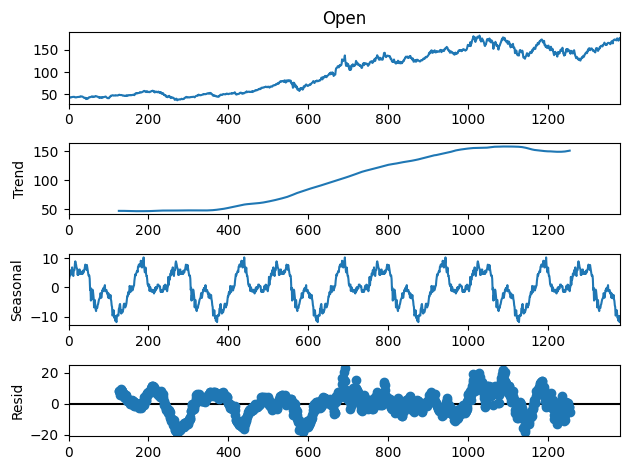

In [7]:
decompose_result = seasonal_decompose(df['Open'],model='additive', period=252)
decompose_result.plot();

In [185]:
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [186]:
# Train the Holt Winters model
model = ExponentialSmoothing(train_data.Open,
                             trend="add",
                             seasonal="add",
                             seasonal_periods=252).fit()

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [187]:
Predictions=model.forecast(test_size)

In [188]:
Pre_val=model.predict(len(df)-val_size, len(df)-1)

In [189]:
# Predict the closing prices for the next 7 days
y_next_7_days = model.predict(len(df), len(df)+7-1)

# Print the predicted closing prices for the next 7 days
print('Predicted closing prices for the next 7 days:')
print(y_next_7_days)


Predicted closing prices for the next 7 days:
1382    171.696610
1383    171.606816
1384    171.982954
1385    172.587978
1386    173.054980
1387    173.835971
1388    174.462650
dtype: float64


In [190]:
y_val = np.array(val_data['Open'])
y_test = np.array(test_data['Open'])

In [191]:
# 7. Đánh giá độ chính xác validate, test
valid_rmse = np.sqrt(np.mean((Pre_val - y_val)**2))
print('Validation RMSE:', valid_rmse)
test_rmse = np.sqrt(np.mean((Predictions - y_test)**2))
print('Testing RMSE:', test_rmse)

Validation RMSE: 21.93822962533888
Testing RMSE: 18.591607827234018


<Axes: >

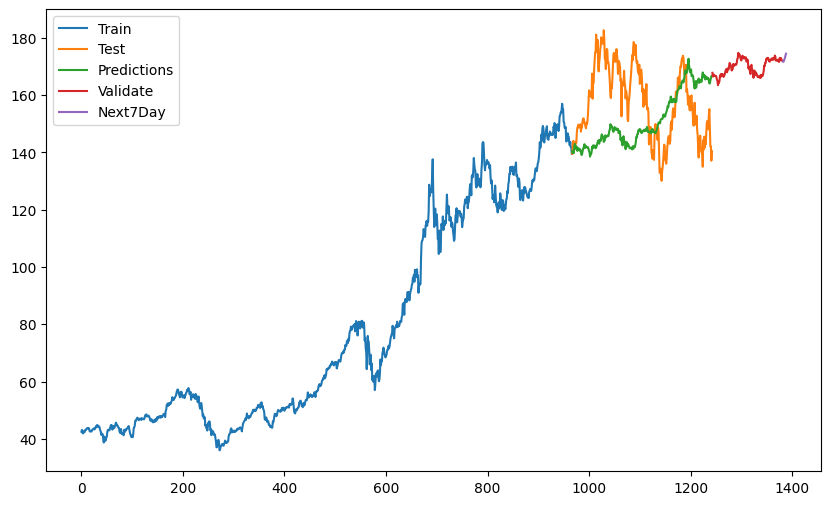

In [192]:
train_data['Open'].plot(legend=True, label='Train',figsize=(10,6))
test_data['Open'].plot(legend=True, label='Test')
Predictions.plot(legend=True, label='Predictions')
Pre_val.plot(legend=True, label='Validate')
y_next_7_days.plot(legend=True, label='Next7Day')
#test_pred_add.plot(legend=True, label='predicted_test_add')

In [193]:
print(model.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                     Open   No. Observations:                  967
Model:             ExponentialSmoothing   SSE                           2269.221
Optimized:                         True   AIC                           1336.845
Trend:                         Additive   BIC                           2584.639
Seasonal:                      Additive   AICC                          1525.607
Seasonal Periods:                   252   Date:                 Sat, 17 Jun 2023
Box-Cox:                          False   Time:                         00:50:35
Box-Cox Coeff.:                    None                                         
                           coeff                 code              optimized      
----------------------------------------------------------------------------------
smoothing_level                0.9449319                alpha                 True
smoothing_trend       

Tỉ lệ 6:3:1

In [195]:
# 2. Đọc file dữ liệu chứng khoán AAPL và chia train test validate theo tỉ lệ 7:1:2
df = pd.read_csv('D:/Năm 3/Học kỳ 2/ThucHanhPTDK/Holt winters/AAPL.csv')
df = df[['Open']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

In [196]:
train_size = int(0.6 * len(df))
test_size = int(0.3 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [197]:
# Train the Holt Winters model
model = ExponentialSmoothing(train_data,
                             trend="add",
                             seasonal="add",
                             seasonal_periods=252).fit()

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [198]:
Predictions=model.forecast(test_size)

In [199]:
Pre_val=model.predict(len(df)-val_size, len(df)-1)

In [200]:
# Predict the closing prices for the next 7 days
y_next_7_days = model.predict(len(df), len(df)+7-1)

# Print the predicted closing prices for the next 7 days
print('Predicted closing prices for the next 7 days:')
print(y_next_7_days)

Predicted closing prices for the next 7 days:
1382    178.316956
1383    178.472788
1384    178.847862
1385    179.865386
1386    179.795719
1387    180.702843
1388    181.343133
dtype: float64


In [201]:
y_val = np.array(val_data['Open'])
y_test = np.array(test_data['Open'])

In [202]:
# 7. Đánh giá độ chính xác validate, test
valid_rmse = np.sqrt(np.mean((Pre_val - y_val)**2))
print('Validation RMSE:', valid_rmse)
test_rmse = np.sqrt(np.mean((Predictions - y_test)**2))
print('Testing RMSE:', test_rmse)

Validation RMSE: 26.42308482279966
Testing RMSE: 15.192105597086023


<Axes: >

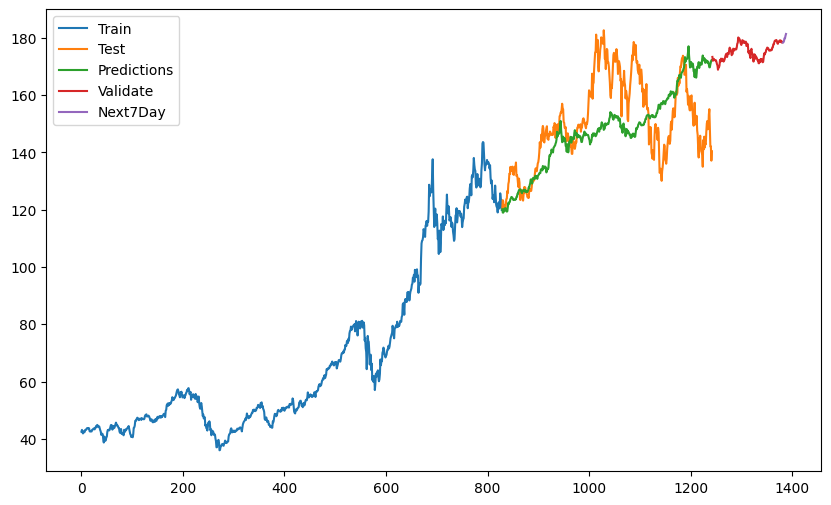

In [203]:
train_data['Open'].plot(legend=True, label='Train',figsize=(10,6))
test_data['Open'].plot(legend=True, label='Test')
Predictions.plot(legend=True, label='Predictions')
Pre_val.plot(legend=True, label='Validate')
y_next_7_days.plot(legend=True, label='Next7Day')
#test_pred_add.plot(legend=True, label='predicted_test_add')

In [204]:
print(model.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                     Open   No. Observations:                  829
Model:             ExponentialSmoothing   SSE                           1814.155
Optimized:                         True   AIC                           1161.236
Trend:                         Additive   BIC                           2369.612
Seasonal:                      Additive   AICC                          1395.699
Seasonal Periods:                   252   Date:                 Sat, 17 Jun 2023
Box-Cox:                          False   Time:                         00:52:24
Box-Cox Coeff.:                    None                                         
                           coeff                 code              optimized      
----------------------------------------------------------------------------------
smoothing_level                0.9678461                alpha                 True
smoothing_trend       